# Gemstone Price Prediction

## Purpose
Gemstone price prediction from tabular dataset using ML algorithms.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

## Version Changes
Hyperparameters changed for decision tree

# Load Data

In [1]:
! pip install colorama

In [2]:
import os
import pandas as pd
import numpy as np
from colorama import Style, Fore

red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

train = pd.read_csv('./../../data/gemstone_price_pred/train.csv')
test = pd.read_csv('./../../data/gemstone_price_pred/test.csv')
original = pd.read_csv('./../../data/gemstone_price_pred/cubic_zirconia.csv')


# Define Features

In [3]:
features = ['carat','cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z' ]

cont_features =['carat', 'depth', 'table', 'x', 'y', 'z'] #Continous Features

cat_features = ['cut', 'color', 'clarity'] #Catergorical Features

target = train['price']

# Exploratory Data Analysis

In [4]:
print(train.shape)
print(test.shape)
print(original.shape)

(193573, 11)
(129050, 10)
(26967, 11)


In [5]:
print(train.info())
print(test.info())
print(original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129050 entries, 0 to 129049
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       129050 non-null  int64  
 1   carat    129050 non-null  float64
 2   cut      129050 non-null  object 
 3   col

In [6]:
print(train.duplicated().sum())
print(test.duplicated().sum())
print(original.duplicated().sum())

0
0
0


In [7]:
original["duplicated"] = original.duplicated(subset=["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"])
original[(original["duplicated"] == True)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,duplicated
2556,2557,0.53,Ideal,G,VVS2,60.4,56.0,5.29,5.24,3.18,2051,True
2931,2932,0.31,Ideal,E,VVS1,61.3,56.0,4.38,4.40,2.69,865,True
3895,3896,1.20,Ideal,G,VVS1,61.2,56.0,6.89,6.86,4.21,9570,True
4200,4201,0.31,Ideal,F,IF,61.2,57.0,4.35,4.38,2.67,1818,True
4259,4260,1.50,Very Good,G,SI2,63.1,57.0,7.29,7.25,4.59,9384,True
...,...,...,...,...,...,...,...,...,...,...,...,...
26191,26192,2.54,Very Good,H,SI2,63.5,56.0,8.68,8.65,5.50,16353,True
26315,26316,0.52,Ideal,D,VS2,62.1,57.0,5.13,5.17,3.20,1689,True
26530,26531,0.41,Ideal,G,IF,61.7,56.0,4.77,4.80,2.95,1367,True
26653,26654,0.55,Ideal,H,SI1,61.5,54.0,5.30,5.33,3.27,1134,True


In [8]:
# checking missing values
print(f' Train Null Value: {train.isna().sum()}')
print(f' \n Test Null Value: {test.isna().sum()}')
print(f' \n Original Null Value: {original.isna().sum()}')

# making new data frame with dropped NA values 
new_original = original.dropna(axis = 0, how ='any') 
print(f' \n New Original Null Value: {new_original.isna().sum()}')

 Train Null Value: id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64
 
 Test Null Value: id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64
 
 Original Null Value: Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
duplicated      0
dtype: int64
 
 New Original Null Value: Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
duplicated    0
dtype: int64


In [9]:
#Understand the statistics of given data.
train[cont_features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
.background_gradient(subset=['std'], cmap='Reds')\
.background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
carat,193573.000000,0.790688,0.462688,0.200000,0.400000,0.700000,1.030000,3.500000
depth,193573.000000,61.820574,1.081704,52.100000,61.300000,61.900000,62.400000,71.600000
table,193573.000000,57.227675,1.918844,49.000000,56.000000,57.000000,58.000000,79.000000
x,193573.000000,5.715312,1.109422,0.000000,4.700000,5.700000,6.510000,9.650000
y,193573.000000,5.720094,1.102333,0.000000,4.710000,5.720000,6.510000,10.010000
z,193573.000000,3.534246,0.688922,0.000000,2.900000,3.530000,4.030000,31.300000


In [10]:
test[cont_features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
carat,129050.000000,0.789256,0.462502,0.200000,0.400000,0.700000,1.030000,4.500000
depth,129050.000000,61.820522,1.080249,53.200000,61.300000,61.900000,62.400000,70.600000
table,129050.000000,57.239608,1.918908,51.000000,56.000000,57.000000,58.000000,70.000000
x,129050.000000,5.711767,1.109666,0.000000,4.700000,5.700000,6.510000,10.140000
y,129050.000000,5.716336,1.102485,0.000000,4.710000,5.720000,6.510000,10.140000
z,129050.000000,3.531802,0.690749,0.000000,2.900000,3.530000,4.030000,31.800000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


# Plots - Univariate and Bivariate Analysis

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# function to plot all box plots at once graphs 
def box_plot(dataframe,features):
    for feature in features:
        sns.boxplot(x= feature, data = dataframe).set(title=feature)
        plt.show()
    return None


# function to plot all box plots at once graphs 
def scatter_plot(dataframe,features,y_target):
    for feature in features:
        sns.scatterplot(x= feature, y=y_target , data = dataframe)
        plt.show()
    return None

## Outliers

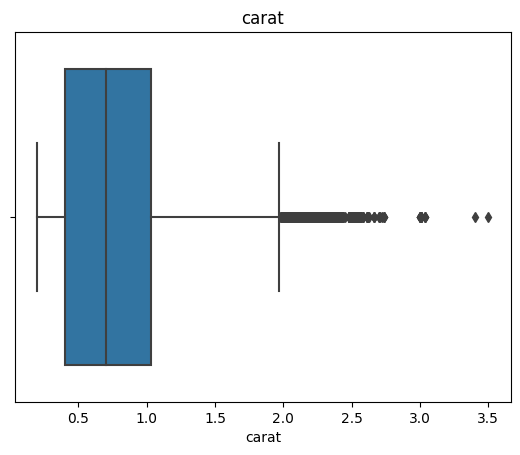

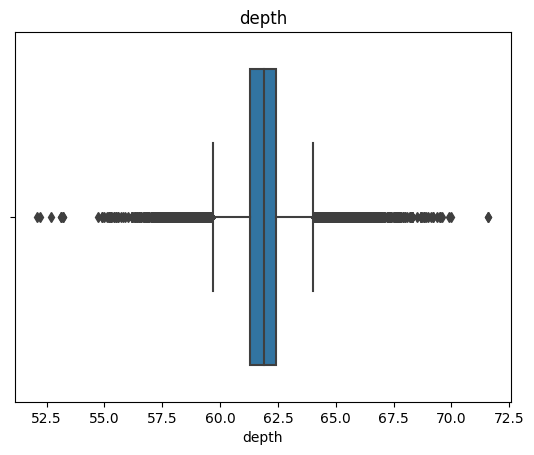

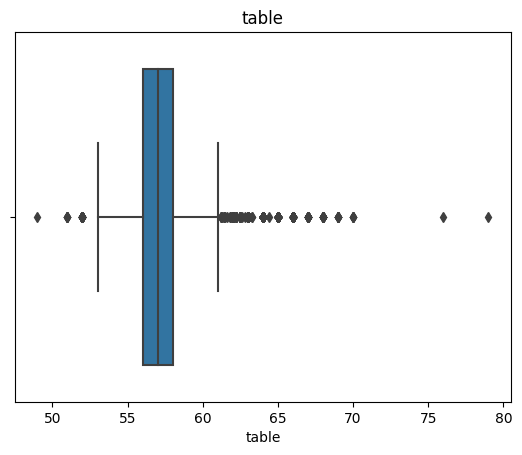

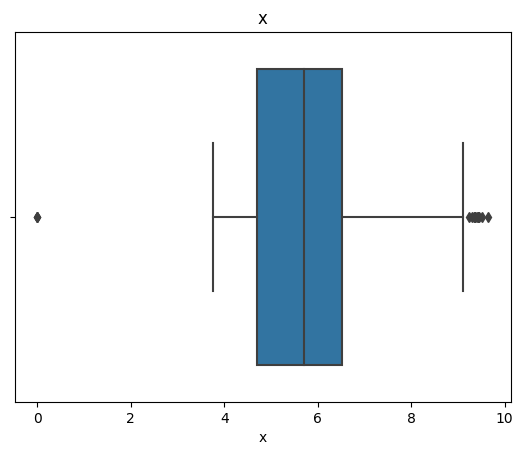

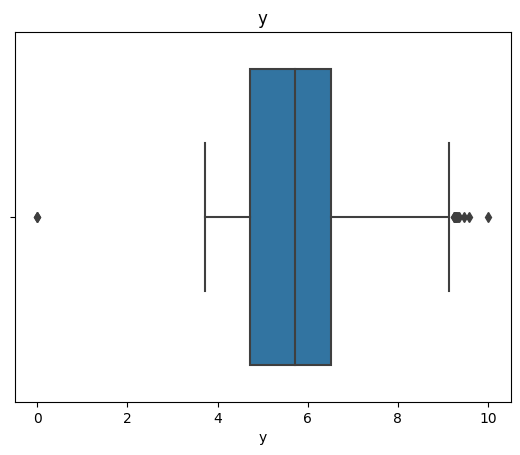

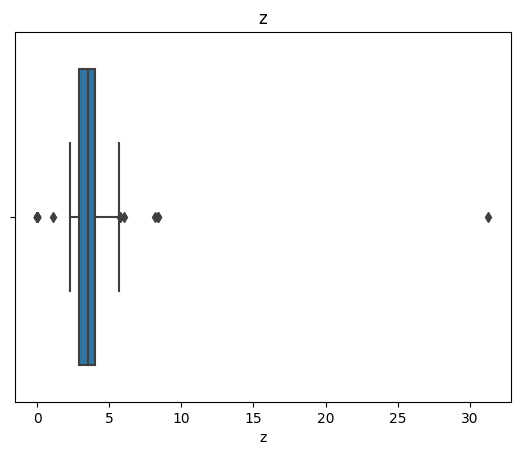

In [13]:
box_plot(train,cont_features)

## Scatterplot 

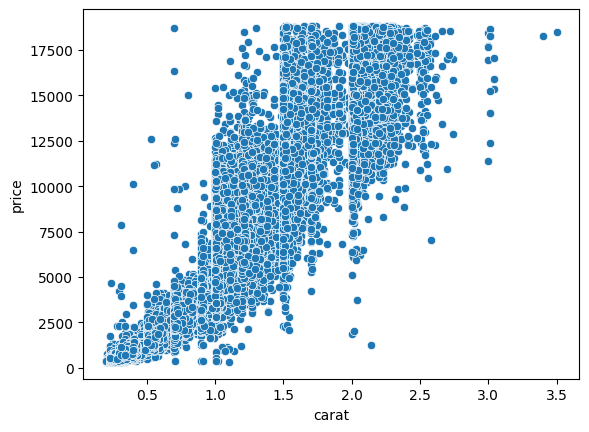

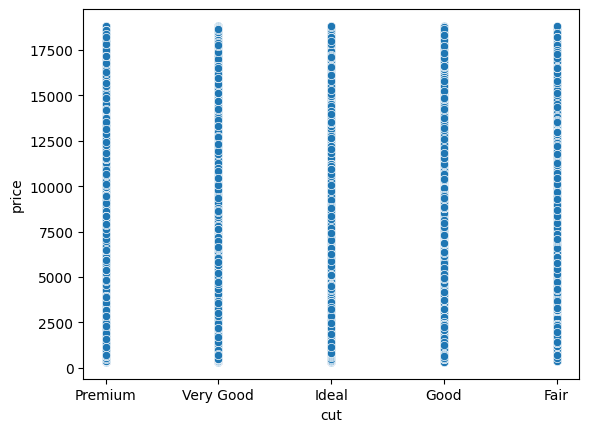

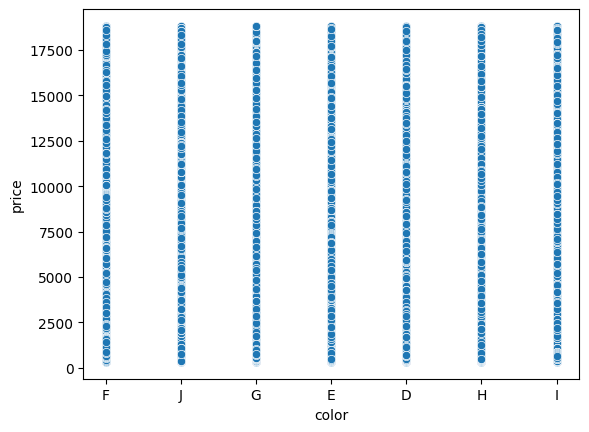

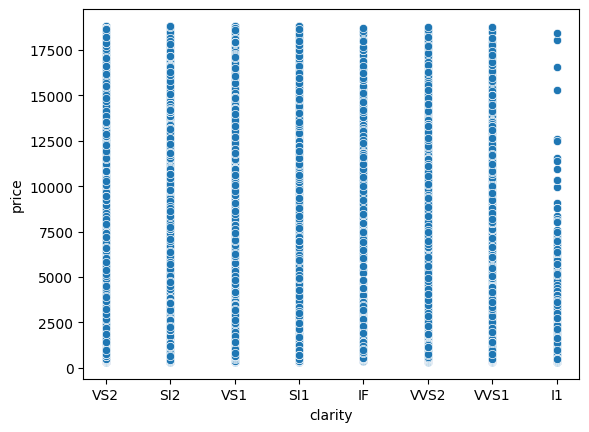

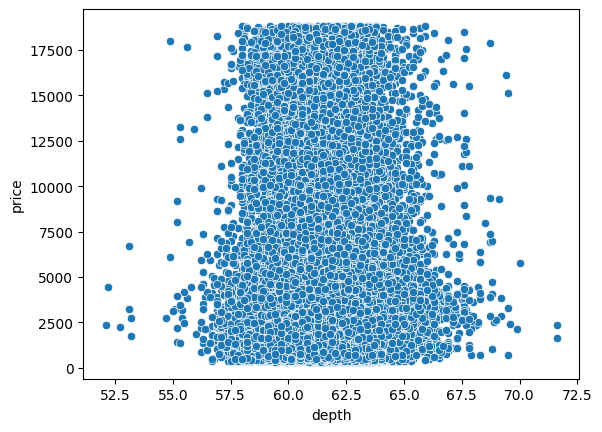

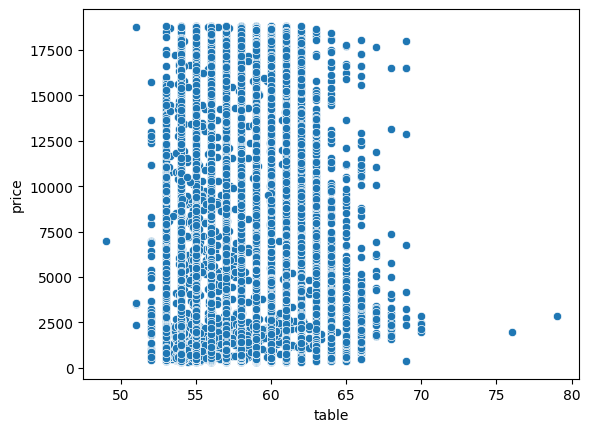

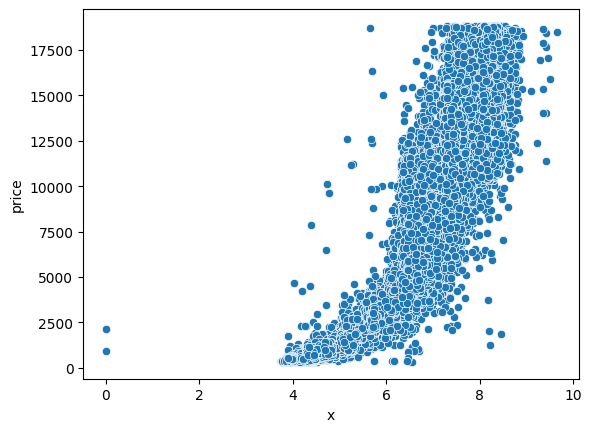

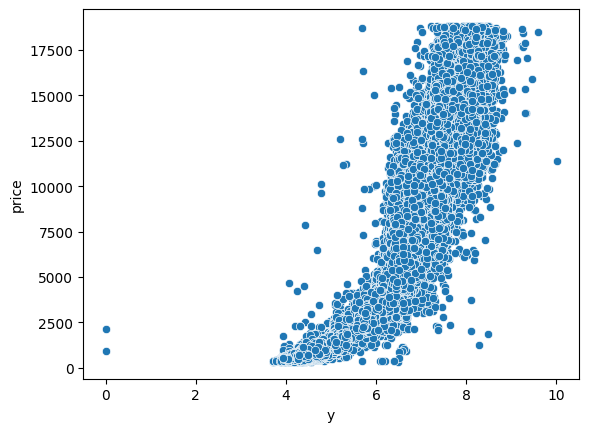

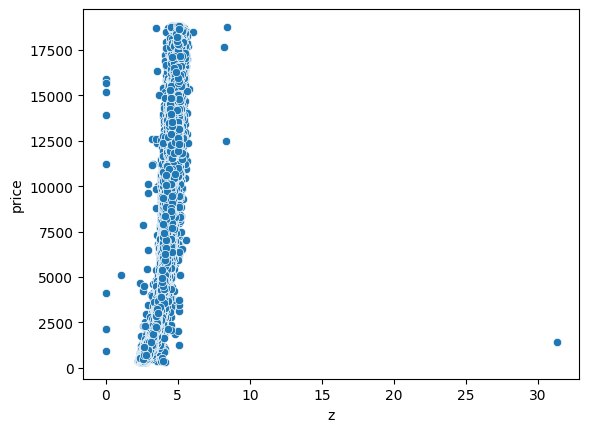

In [14]:
scatter_plot(train,features,target)

## HeatMap

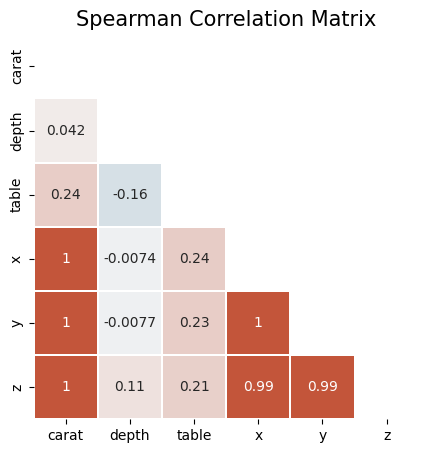

In [15]:
correlation_matrix = train[cont_features].corr(method="spearman")
from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(5, 5))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix", fontsize=15)

# Feature Exploration

/var/folders/m0/bg96ysv92hdczb8khtc0grfc0000gn/T/ipykernel_24916/1067449579.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ = sns.kdeplot(train_copy["aspect_ratio"], shade=True, color="r", ax=axs, label="Aspect Ratio Densities")


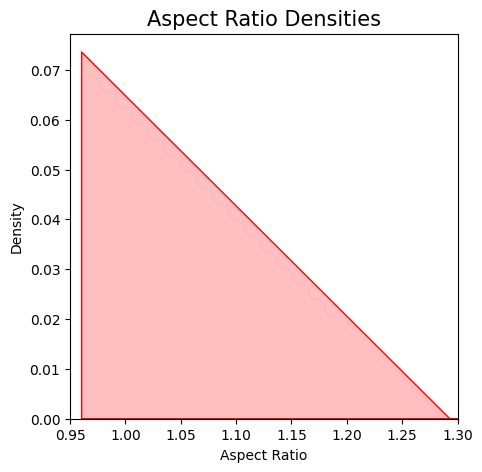

In [16]:
train_copy = train.copy()
train_copy["y"] = train_copy["y"].apply(lambda n: 0.1 if n == 0 else n)
train_copy["x"] = train_copy["x"].apply(lambda n: 0.1 if n == 0 else n)
train_copy["z"] = train_copy["x"].apply(lambda n: 0.1 if n == 0 else n)
train_copy["new_y"] = train_copy[["x", "y"]].apply(lambda row: row.y if row.y <= row.x else row.x, axis=1)
train_copy["new_x"] = train_copy[["x", "y"]].apply(lambda row: row.y if row.y >= row.x else row.x, axis=1)
train_copy["aspect_ratio"] = train_copy["new_x"] / train_copy["new_y"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

_ = sns.kdeplot(train_copy["aspect_ratio"], shade=True, color="r", ax=axs, label="Aspect Ratio Densities")
_ = axs.set_title("Aspect Ratio Densities", fontsize=15)
_ = axs.set_ylabel("Density")
_ = axs.set_xlabel("Aspect Ratio")
_ = axs.set_xlim((0.95, 1.3))

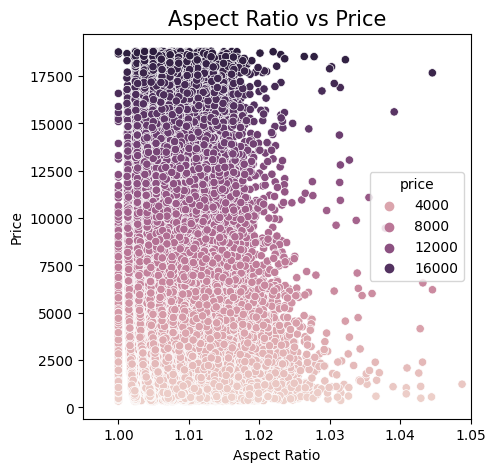

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

_ = sns.scatterplot(data=train_copy, x="aspect_ratio", y="price", hue="price", ax=ax)
_ = ax.set_title("Aspect Ratio vs Price", fontsize=15)
_ = ax.set_ylabel("Price")
_ = ax.set_xlabel("Aspect Ratio")
_ = ax.set_xlim((0.995, 1.05))

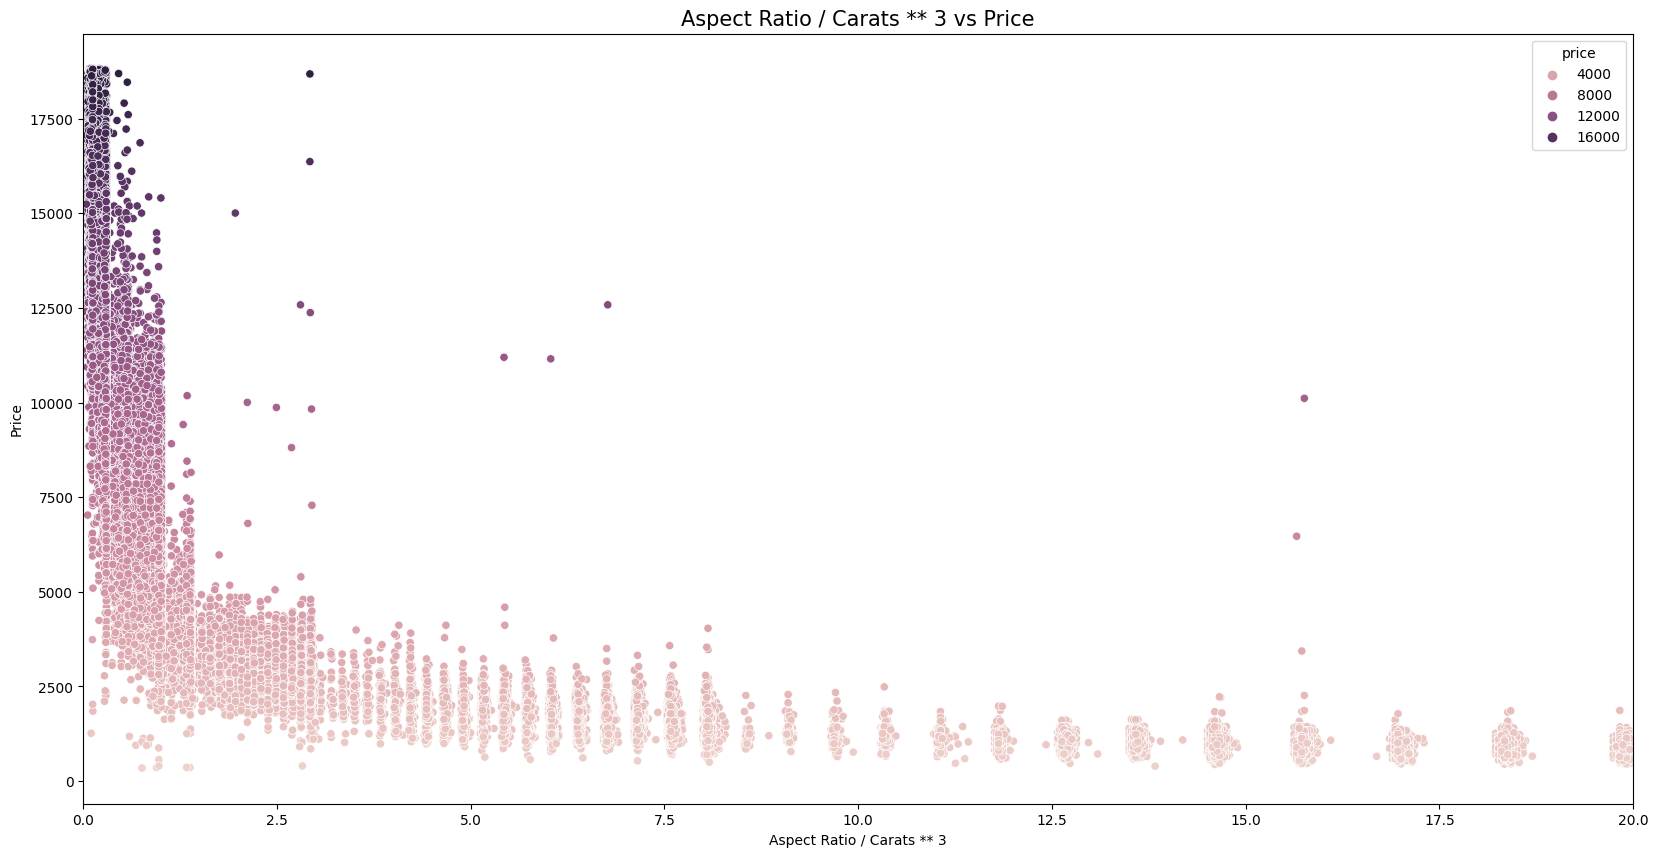

In [18]:
train_copy["aspect_ratio_carat"] = (train_copy["new_x"] / train_copy["new_y"]) / train_copy["carat"] ** 3

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

_ = sns.scatterplot(data=train_copy, x="aspect_ratio_carat", y="price", hue="price", ax=ax)
_ = ax.set_title("Aspect Ratio / Carats ** 3 vs Price", fontsize=15)
_ = ax.set_ylabel("Price")
_ = ax.set_xlabel("Aspect Ratio / Carats ** 3")
_ = ax.set_xlim((0, 20))

# Models

In [19]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
import time

In [20]:
train_copy['x']=train_copy['new_x']
train_copy['y']=train_copy['new_y']
train_copy=train_copy.drop(columns=['new_x', 'new_y','aspect_ratio'])
train_copy.describe()

,id,carat,depth,table,x,y,z,price,aspect_ratio_carat
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.737835,5.697574,5.715314,3969.155414,10.999816
std,55879.856166,0.462688,1.081704,1.918844,1.109518,1.101862,1.109414,4034.374138,14.816050
min,0.000000,0.200000,52.100000,49.000000,0.100000,0.100000,0.100000,326.000000,0.023470
25%,48393.000000,0.400000,61.300000,56.000000,4.730000,4.690000,4.700000,951.000000,0.919378
50%,96786.000000,0.700000,61.900000,57.000000,5.730000,5.690000,5.700000,2401.000000,2.925682
75%,145179.000000,1.030000,62.400000,58.000000,6.530000,6.490000,6.510000,5408.000000,15.790169
max,193572.000000,3.500000,71.600000,79.000000,10.010000,9.590000,9.650000,18818.000000,187.476775


In [21]:
#Train Label Encoding

for feature in cat_features:   
    le =preprocessing.LabelEncoder()
    le.fit(train_copy[feature])
    train_copy[feature] = le.transform(train_copy[feature])
    
train_copy["price"] = train_copy["price"].astype(np.float32)
X, y = train_copy.drop(columns=['price']), train_copy.price

# validation set
n_folds = 5
cv = KFold(n_splits=n_folds, random_state=2022, shuffle=True)
train_oof_preds = np.zeros((train.shape[0],))

## Decision Tree

### Basic Decision Tree

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a decision tree model
dtreg = DecisionTreeRegressor(random_state=2023)
 
begin = time.time()

# Train the decision tree model
dtreg.fit(X_train,y_train)

# Make predictions using the decision tree model
y_train_pred = dtreg.predict(X_train)
y_test_pred = dtreg.predict(X_test)

# Calculate the evaluation score
dt_train_rsme = mean_squared_error(y_train, y_train_pred, squared=False)
dt_test_rsme = mean_squared_error(y_test, y_test_pred, squared=False)

end = time.time()

print(f"Total runtime of the program is {end - begin}")
print(f'{"*" * 45}\n{red}Train{res} RMSE: {red}{dt_train_rsme:.5f}')
print(f'{"*" * 45}\n{red}Test{res} RMSE: {red}{dt_test_rsme:.5f}')

Total runtime of the program is 1.398237943649292
*********************************************
Train RMSE: 0.00000
*********************************************
Test RMSE: 829.65706


In [24]:
dtreg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2023,
 'splitter': 'best'}

### Hyperparameter Tuning

In [25]:
# Create the parameter grid based on the results of random search 
parameters={"max_depth" : [8,9,10,11,12,13],
            "min_samples_split":[25,26,27,28,29,30,31,32,33,34,35],
            "min_samples_leaf":[3,4,5,6,7] }

# Instantiate the grid search model
tuning_model = GridSearchCV(estimator=dtreg, 
                           param_grid=parameters, 
                           cv=3, n_jobs=-1, verbose=2,
                           scoring = "neg_root_mean_squared_error")

In [26]:
begin = time.time()

# Train the decision tree model
tuning_model.fit(X_train,y_train)

end = time.time()
print(f"Total runtime of the program is {end - begin}")

# # Make predictions using the decision tree model
# y_train_pred = grid_search.predict(X_train)
# y_test_pred = grid_search.predict(X_test)

# # Calculate the evaluation score
# dt_train_rsme = mean_squared_error(y_train, y_train_pred, squared=False)
# dt_test_rsme = mean_squared_error(y_test, y_test_pred, squared=False)

# end = time.time()

# print(f"Total runtime of the program is {end - begin}")
# print(f'{"*" * 45}\n{red}Train{res} RMSE: {red}{dt_train_rsme:.5f}')
# print(f'{"*" * 45}\n{red}Test{res} RMSE: {red}{dt_test_rsme:.5f}')

Fitting 3 folds for each of 330 candidates, totalling 990 fits
Total runtime of the program is 181.7625548839569


In [32]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 28}

In [28]:
# best model score
tuning_model.best_score_

-636.7989326834153

[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=25; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=29; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=31; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=34; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=26; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=28; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=31; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=34; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=26; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=28; total time=   0.4s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=31; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=5, min_samples_split=33; total time=   0.5s
[CV]

### Training With Best Hyperparameters

-------> Fold 1 <--------
                     RMSE:648.258       
-------> Fold 2 <--------
                     RMSE:628.080       
-------> Fold 3 <--------
                     RMSE:610.923       
-------> Fold 4 <--------
                     RMSE:616.687       
-------> Fold 5 <--------
                     RMSE:620.718       
-------> Fold 6 <--------
                     RMSE:628.860       
-------> Fold 7 <--------
                     RMSE:631.462       
-------> Fold 8 <--------
                     RMSE:602.782       
-------> Fold 9 <--------
                     RMSE:627.508       
-------> Fold 10 <--------
                     RMSE:606.868       
*********************************************
Mean RMSE: 622.34660

*********************************************
Test RMSE: 561.68114


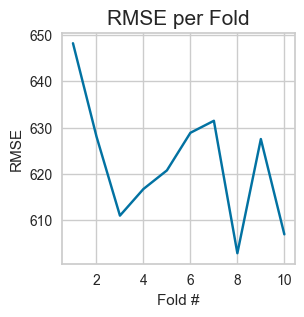

In [71]:
# Create a decision tree model with best hyperparameters
tuned_hyper_dt=tuning_model.best_estimator_

dt_rmse_scores = []
oof = []
dt_models_ = []
dt_feature_importances_ = pd.DataFrame(index=test.columns)
cv_dt = KFold(n_splits=10, random_state=2022, shuffle=True)

for fold_i, (fit_idx, val_idx) in enumerate(cv_dt.split(X, y)):
    print("-------> Fold {} <--------".format(fold_i + 1))
    # Split the dataset according to the fold indexes.
    X_fit = X.iloc[fit_idx]
    X_val = X.iloc[val_idx]
    y_fit = y.iloc[fit_idx]
    y_val = y.iloc[val_idx]

    # Train decision trees with best hyperparameters
    tuned_hyper_dt.fit(X_fit, y_fit)
    
    #Prediction on validation set in each fold
    val_preds = tuned_hyper_dt.predict(X_val)
    val_score = mean_squared_error(y_val, val_preds, squared=False)
    dt_rmse_scores.append(val_score)
    print(f'{" " * 20} RMSE:{blu}{val_score:.3f}{res} {" " * 6}')

    #Out of Fold
    idx_pred_target = np.vstack([val_idx, val_preds, y_val]).T  # shape(len(val_idx), 3)
    oof.append(idx_pred_target)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))

data = pd.DataFrame({"Fold": [x + 1 for x in range(10)], "RMSE": dt_rmse_scores})
_ = sns.lineplot(x="Fold", y="RMSE", data=data, ax=ax)
_ = ax.set_title("RMSE per Fold", fontsize=15)
_ = ax.set_ylabel("RMSE")
_ = ax.set_xlabel("Fold #")

def get_mean_rmse(oof: np.array):
    """oof: ['val_idx', 'preds', 'target']"""
    oof = pd.DataFrame(np.concatenate(oof), columns=['id', 'preds', 'target']).set_index('id')
    oof.index = oof.index.astype(int)
    mean_val_rmse = mean_squared_error(oof.target, oof.preds, squared=False)
    return mean_val_rmse
    
mean_val_rmse = get_mean_rmse(oof)
print(f'{"*" * 45}\n{red}Mean{res} RMSE: {red}{mean_val_rmse:.5f}\n')

# Make predictions using the decision tree model
y_test_pred = tuned_hyper_dt.predict(X_test)

# Calculate the evaluation score
dt_test_rsme = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'{"*" * 45}\n{red}Test{res} RMSE: {red}{dt_test_rsme:.5f}')

### Save Prediction

In [74]:
def predict(X):
    y = np.zeros(len(X))
    y = tuned_hyper_dt.predict(X)
    return y

test_copy = test.copy()

for feature in cat_features:   
    le =preprocessing.LabelEncoder()
    le.fit(test_copy[feature])
    test_copy[feature] = le.transform(test_copy[feature])

predictions = predict(test_copy)
sub = pd.read_csv("./../../data/gemstone_price_pred/sample_submission.csv")
sub.price = predictions
sub.to_csv('DT_submission', index=False)
sub.head(3)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- aspect_ratio_carat


## XGBoost

### Basic XGBoost

-------> Fold 1 <--------
[0]	fit-rmse:5099.92776	val-rmse:5125.58020
[10]	fit-rmse:1898.86432	val-rmse:1914.30663
[20]	fit-rmse:890.64705	val-rmse:910.89124
[30]	fit-rmse:638.94006	val-rmse:668.56825
[40]	fit-rmse:583.52381	val-rmse:618.92053
[50]	fit-rmse:566.90519	val-rmse:606.44212
[60]	fit-rmse:558.66243	val-rmse:601.25393
[70]	fit-rmse:552.91448	val-rmse:599.15010
[80]	fit-rmse:548.82935	val-rmse:598.14583
[90]	fit-rmse:545.08806	val-rmse:597.74288
[100]	fit-rmse:541.55648	val-rmse:596.96637
[110]	fit-rmse:538.24645	val-rmse:596.79428
[115]	fit-rmse:536.72096	val-rmse:596.84838
                     RMSE:596.706        best iteration  :106
-------> Fold 2 <--------
[0]	fit-rmse:5118.88903	val-rmse:5050.10182
[10]	fit-rmse:1904.93495	val-rmse:1882.55472
[20]	fit-rmse:894.24089	val-rmse:888.74671
[30]	fit-rmse:643.68771	val-rmse:645.15565
[40]	fit-rmse:590.03537	val-rmse:595.09317
[50]	fit-rmse:572.94222	val-rmse:581.26078
[60]	fit-rmse:564.86797	val-rmse:576.76288
[70]	fit-rmse:559

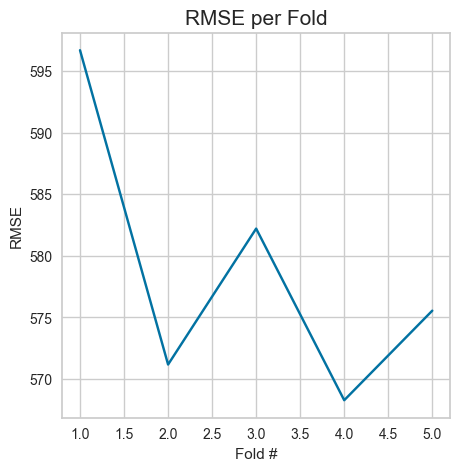

In [17]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

train_copy = train.copy()
test_copy = test.copy()

for feature in cat_features:   
    le =preprocessing.LabelEncoder()
    le.fit(train_copy[feature])
    train_copy[feature] = le.transform(train_copy[feature])
    test_copy[feature] = le.transform(test_copy[feature])

train_copy["price"] = train_copy["price"].astype(np.float32)
X, y = train_copy.drop(columns=['price']), train_copy.price

rmse_scores = []
feature_importances_ = pd.DataFrame(index=test.columns)
eval_results_ = {}
models_ = []
oof = []

# validation set
n_folds = 5
cv = KFold(n_splits=n_folds, random_state=2022, shuffle=True)
train_oof_preds = np.zeros((train.shape[0],))

# split() created indices for fit and val, enumerate added serial number before each fold : (Fold i, array(fit indices),array(val indices))
for fold_i, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    print("-------> Fold {} <--------".format(fold_i + 1))
    # Split the dataset according to the fold indexes.
    X_fit = X.iloc[fit_idx]
    X_val = X.iloc[val_idx]
    y_fit = y.iloc[fit_idx]
    y_val = y.iloc[val_idx]

    fit_set = xgb.DMatrix(X_fit, y_fit)
    val_set = xgb.DMatrix(X_val, y_val)
    evaluation_list = [(fit_set, 'fit'), (val_set, 'val')]
    

    # Define parameters for XGBoost model hyperparameter tuning
    params = {'verbosity': 0,
              'objective': 'reg:squarederror',
              'eval_metric': 'rmse',
              'learning_rate': 0.1,
              'early_stopping_rounds': 10
              }
    
    # Specify which dataset and which metric should be used for early stopping.
    early_stop = xgb.callback.EarlyStopping(rounds=params['early_stopping_rounds'],
                                            data_name='val',
                                            save_best=True
                                           )

    # Train gradient boosted trees using root mean squared
    model = xgb.train(params, fit_set, num_boost_round=1000,
                      evals=evaluation_list,
                      verbose_eval=10,
                      callbacks=[early_stop]
                     )
    
    #Prediction on validation set and best iteration in each fold
    val_preds = model.predict(val_set)
    val_score = mean_squared_error(y_val, val_preds, squared=False)
    rmse_scores.append(val_score)
    best_iter = model.best_iteration
    print(f'{" " * 20} RMSE:{blu}{val_score:.3f}{res} {" " * 6} best iteration  :{blu}{best_iter}{res}')

    #
    idx_pred_target = np.vstack([val_idx, val_preds, y_val]).T  # shape(len(val_idx), 3)
    oof.append(idx_pred_target)

    # Stores the feature importances
    feature_importances_[f'gain_{fold_i}'] = model.get_score(importance_type='gain').values()
    feature_importances_[f'split_{fold_i}'] = model.get_score(importance_type='weight').values()

    # Stores the model
    models_.append(model)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "RMSE": rmse_scores})
_ = sns.lineplot(x="Fold", y="RMSE", data=data, ax=ax)
_ = ax.set_title("RMSE per Fold", fontsize=15)
_ = ax.set_ylabel("RMSE")
_ = ax.set_xlabel("Fold #")

def get_mean_rmse(oof: np.array):
    """oof: ['val_idx', 'preds', 'target']"""
    oof = pd.DataFrame(np.concatenate(oof), columns=['id', 'preds', 'target']).set_index('id')
    oof.index = oof.index.astype(int)
    mean_val_rmse = mean_squared_error(oof.target, oof.preds, squared=False)
    return mean_val_rmse
    
mean_val_rmse = get_mean_rmse(oof)
print(f'{"*" * 45}\n{red}Mean{res} RMSE: {red}{mean_val_rmse:.5f}')

### Save Predictions

In [26]:
def predict(X):
    y = np.zeros(len(X))
    for model in models_:
        y += model.predict(xgb.DMatrix(X))
    return y / len(models_)

predictions = predict(test_copy)
sub = pd.read_csv("./../../data/gemstone_price_pred/sample_submission.csv")
sub.price = predictions
sub.to_csv('first_submission', index=False)
sub.head(3)

,id,price
0,193573,866.792078
1,193574,2533.526123
2,193575,2318.882471


# Reference
https://www.diamonds.pro/guides/diamond-proportion/

https://machinelearninginterview.com/topics/machine-learning/target-encoding-for-categorical-features/

https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation

https://www.kaggle.com/code/subinium/11-categorical-encoders-and-benchmark

https://naemazam.medium.com/learn-seaborn-a-brief-guide-87f5a1b5e75f

https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-analysis

https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression

https://statquest.org/
